In [24]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import altair as alt
import matplotlib.pyplot as plt


#manejo de datos
import pandas as pd
import numpy as np
import datetime
# Graficación
import matplotlib.pyplot as plt
import seaborn as sns
# Analisis de la serie temporal
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Modelo
from pmdarima import auto_arima
# Metricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# Serializacion del modelo
import pickle
# Cargar los datos
df = pd.read_csv('/workspaces/linea_temporal_alternativa/data/raw/Aquifer_Petrignano.csv')

# Imputar valores nulos con fordward fill y backwardfill
for column_name in df.select_dtypes(include='number').columns:
    df[column_name] = df[column_name].fillna(method='bfill').fillna(method='ffill')

# Preprocesamiento de la fecha
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Year'] = df['Date'].dt.year
df['DayOfYear'] = df['Date'].dt.dayofyear


/tmp/ipykernel_1970/951605869.py:32: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column_name] = df[column_name].fillna(method='bfill').fillna(method='ffill')


In [30]:

# Dividir los datos en train y test
X = df.select_dtypes(include='number').drop('Depth_to_Groundwater_P24', axis=1)
y = df['Depth_to_Groundwater_P24']
train_length =int(len(X)*0.8)
X_train, y_train = X[:train_length], y[:train_length]
X_test, y_test = X[train_length:], y[train_length:]
# crear instancia TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Crear modelo de regresión lineal y listas para almacenar las métricas
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# metricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)




In [31]:

# Imprimir resultados promedio y desviación estándar de las métricas
print(f' MSE: {mse}')
print(f'Mean RMSE: {rmse}')
print(f'Mean R^2: {r2}')

# Entrenar el modelo con todos los datos
model.fit(X, y)


 MSE: 0.02343457242982244
Mean RMSE: 0.1530835472211904
Mean R^2: 0.9782208590256


LinearRegression()

In [32]:
# Realizar predicciones y guardarlas en una nueva columna
predictions = model.predict(X_train)

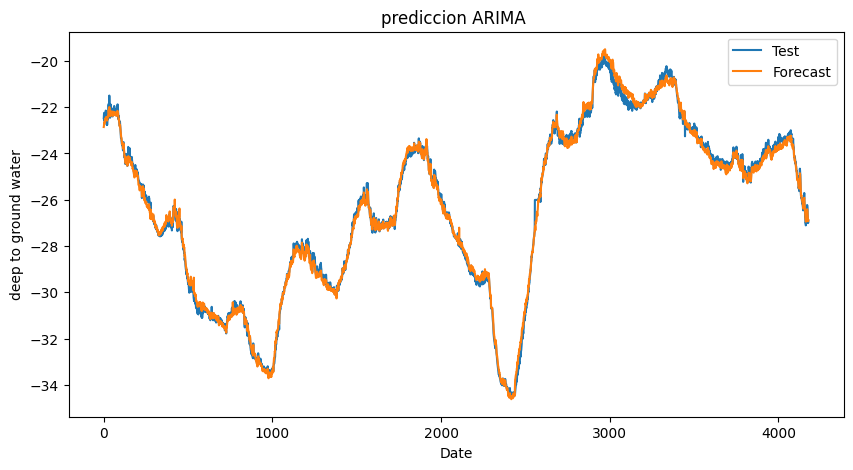

In [35]:
# Graficar las predicciones contra los verdaderos valores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_train, label='Test')
plt.plot(predictions, label='Forecast')
plt.title('prediccion ARIMA ')
plt.xlabel('Date')
plt.ylabel('deep to ground water')
plt.legend()
plt.show()